In [150]:
import pandas as pd

import matplotlib.pyplot as plt


In [151]:
stockprices = pd.read_csv("C./SPX.csv")
stockprices = stockprices[10000:]
stockprice_value_today = stockprices["Open"].iloc[-1]
print(stockprice_value_today)


3406.459961


In [152]:
stockprices["daily_change"] = (stockprices["Open"]/stockprices["Open"].shift(1))-1
stockprices["Date"] = pd.to_datetime(stockprices['Date'], format='%d/%m/%Y')

stockprices["value_invested_monthly"] =  stockprices['Date'].dt.day.apply(lambda x: 100 if x == 1 else 0)
stockprices["monthly_invested_cumsum"] = stockprices["value_invested_monthly"].cumsum()
stockprices["monthly_to_today"] = stockprices["value_invested_monthly"] / stockprices["Open"] * stockprice_value_today
stockprices["monthly_cumsum"] = stockprices["monthly_to_today"].cumsum()

stockprices["value_invested_minus"] = stockprices["daily_change"].apply(lambda x: 500 if x < -0.03 else 0)
stockprices["minus_invested_cumsum"] = stockprices["value_invested_minus"].cumsum()
stockprices["minus_to_today"] = stockprices["value_invested_minus"] / stockprices["Open"] * stockprice_value_today
stockprices["minus_cumsum"] = stockprices["minus_to_today"].cumsum()



print("Value invested: ", stockprices["value_invested_monthly"].sum())
print("Value today:", stockprices["monthly_to_today"].sum())

print("Value invested MINUS: ", stockprices["value_invested_minus"].sum())
print("Value today MINUS:", stockprices["minus_to_today"].sum())




Value invested:  40300
Value today: 560266.4956953144
Value invested MINUS:  47000
Value today MINUS: 262931.3664122267


,Date,Open,High,Low,Close,Adj Close,Volume,daily_change,value_invested_monthly,monthly_invested_cumsum,monthly_to_today,monthly_cumsum,value_invested_minus,minus_invested_cumsum,minus_to_today,minus_cumsum
10000,1967-12-01,94.000000,94.949997,93.410004,94.500000,94.500000,9740000,NaN,100,100,3623.893576,3623.893576,0,0,0.0,0.000000
10001,1967-12-04,94.500000,95.680000,94.089996,95.099998,95.099998,11740000,0.005319,0,100,0.000000,3623.893576,0,0,0.0,0.000000
10002,1967-12-05,95.099998,96.269997,94.519997,95.230003,95.230003,12940000,0.006349,0,100,0.000000,3623.893576,0,0,0.0,0.000000
10003,1967-12-06,95.230003,96.160004,94.099998,95.639999,95.639999,11940000,0.001367,0,100,0.000000,3623.893576,0,0,0.0,0.000000
10004,1967-12-07,95.639999,96.669998,95.040001,95.529999,95.529999,12490000,0.004305,0,100,0.000000,3623.893576,0,0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23318,2020-10-29,3277.169922,3341.050049,3259.820068,3310.110107,3310.110107,4903070000,-0.019539,0,40300,0.000000,560266.495695,0,47000,0.0,262931.366412
23319,2020-10-30,3293.590088,3304.929932,3233.939941,3269.959961,3269.959961,4840450000,0.005010,0,40300,0.000000,560266.495695,0,47000,0.0,262931.366412
23320,2020-11-02,3296.199951,3330.139893,3279.739990,3310.239990,3310.239990,4310590000,0.000792,0,40300,0.000000,560266.495695,0,47000,0.0,262931.366412
23321,2020-11-03,3336.250000,3389.489990,3336.250000,3369.159912,3369.159912,4220070000,0.012150,0,40300,0.000000,560266.495695,0,47000,0.0,262931.366412


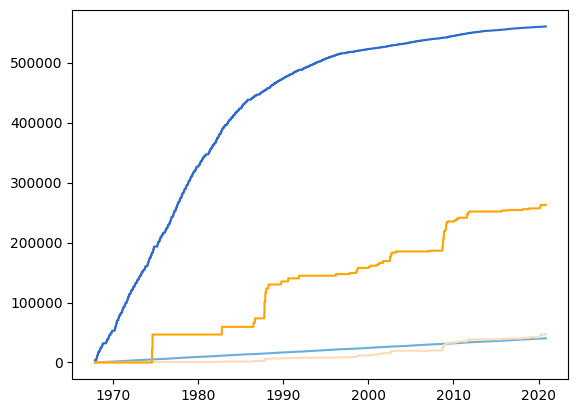

In [153]:
display(stockprices)
plt.plot(stockprices["Date"],stockprices["monthly_invested_cumsum"],color="#69afdc")
plt.plot(stockprices["Date"],stockprices["monthly_cumsum"],color="#2c6acc")

plt.plot(stockprices["Date"],stockprices["minus_invested_cumsum"],color="#FFDBBB")
plt.plot(stockprices["Date"],stockprices["minus_cumsum"],color="#FFA500")

plt.show()